In [1]:
import numpy as np
from scipy import signal

import soundfile as sf
import IPython.display as ipd

import matplotlib.pyplot as plt
from funcs import plot_settings

In [2]:
plot_settings()

In [3]:
def adaptrls(x, d, p, Lambda, alpha):
    N = len(x)
    w = np.zeros(p)
    R = np.eye(p) * alpha 
    e = np.zeros(N) 

    for i in range(p, N):
        x_i = np.flip(x[max(0, i-p+1):i+1], axis=0)
        # print(x_i.shape, w.shape)
        y_i = np.dot(w, x_i)

        e[i] = d[i] - y_i

        k = np.dot(R, x_i) / (Lambda + np.dot(np.dot(x_i, R), x_i))

        w += k * e[i]

        R = (R - np.outer(k, np.dot(x_i, R))) / Lambda 

    return w, e


In [4]:
p = 16

h = np.random.random((p, ))*10
x = np.random.random((1000, ))*10

sigma = 1e-4

d = signal.lfilter(h, 1, x) + np.random.normal(0, sigma, len(x))

In [5]:
w, e = adaptrls(x, d, p, 0.95, 1e5)

In [6]:
print(f"Относительная ошибка весов:{max(abs(w-h))/h}")

Относительная ошибка весов:[3.92329014e-06 3.78354765e-06 1.64045996e-06 1.61273816e-06
 2.47072129e-06 8.27336820e-06 2.58318458e-05 1.65611915e-05
 2.01688584e-05 2.51236846e-06 1.78036764e-06 5.03816219e-05
 1.64969703e-06 7.06184528e-06 1.27552506e-05 1.50755778e-06]


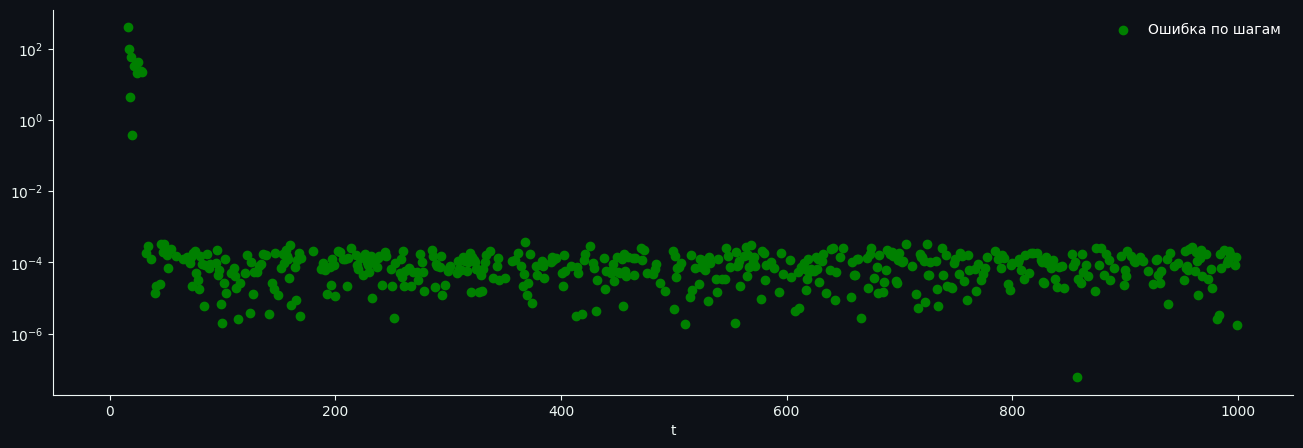

In [7]:
plt.rcParams["figure.figsize"] = (16,5)
plt.scatter(range(len(e)), e, label="Ошибка по шагам")
plt.xlabel("t")
plt.yscale("log")
plt.legend()

In [8]:
h = np.random.random((16, ))*10

x = np.random.random((1000, ))*10

def experiment(sigma=1e-3, p=16, Lambda=0.95):
    d = signal.lfilter(h, 1, x) + np.random.normal(0, sigma, len(x))
    w, e = adaptrls(x, d, p, Lambda, 1e5)

    plt.scatter(range(len(e)), e, label="Ошибка по шагам")
    plt.xlabel("t")
    plt.yscale("log")
    plt.title(f"h=16, p={p}, $\sigma$={sigma}, $\lambda$={Lambda}")
    plt.legend()
    return w, e
    

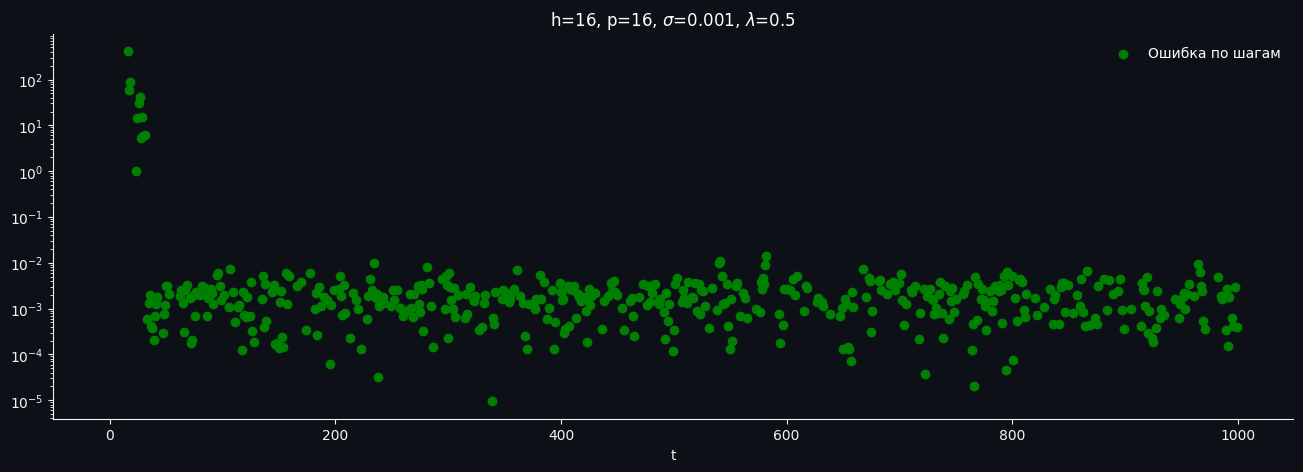

In [9]:
w, e = experiment(1e-3, 16, 0.5)

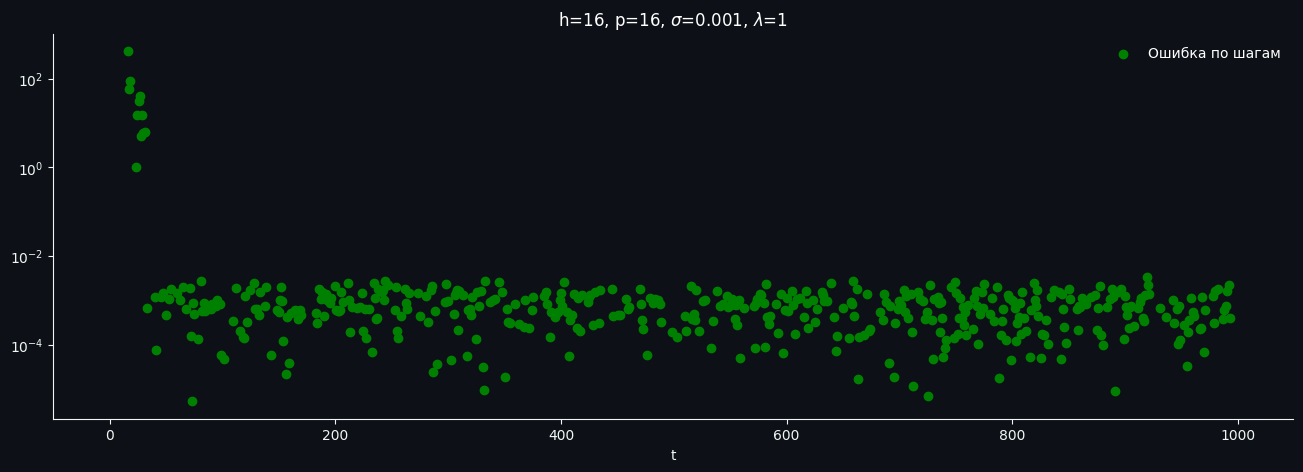

In [10]:
w, e = experiment(1e-3, 16, 1)

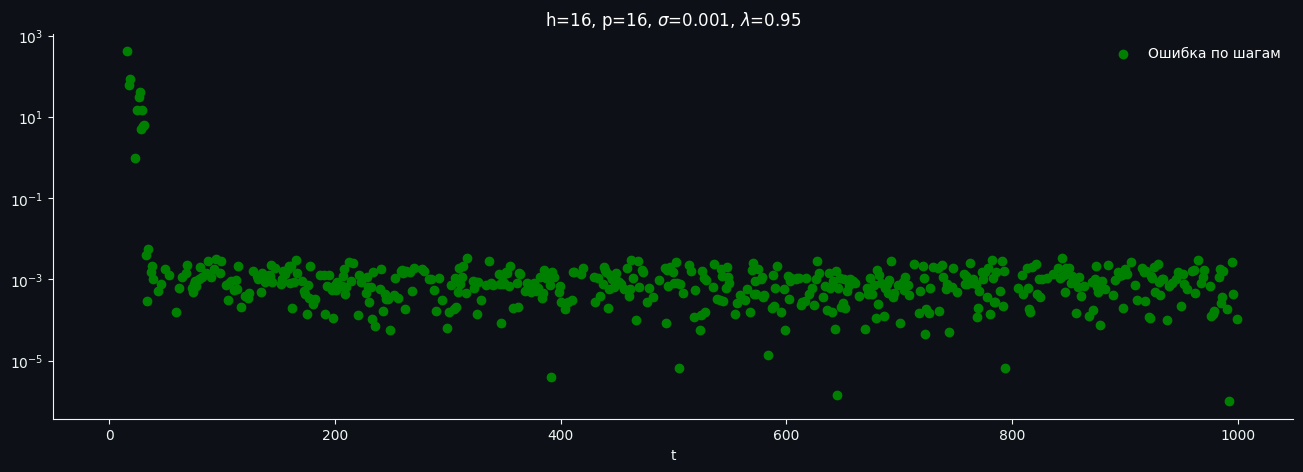

In [11]:
w, e = experiment(1e-3, 16, 0.95)

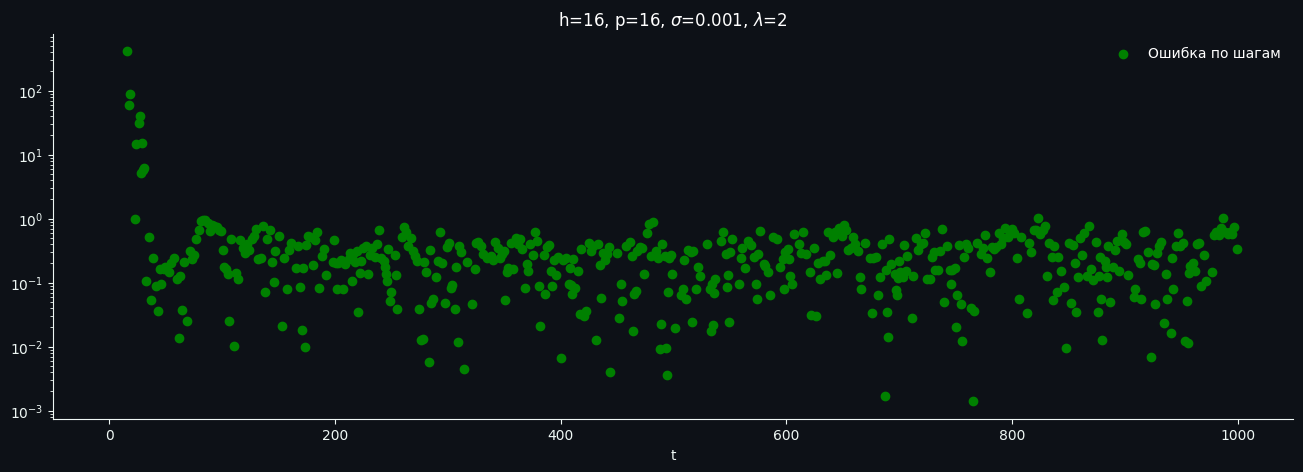

In [12]:
w, e = experiment(1e-3, 16, 2)

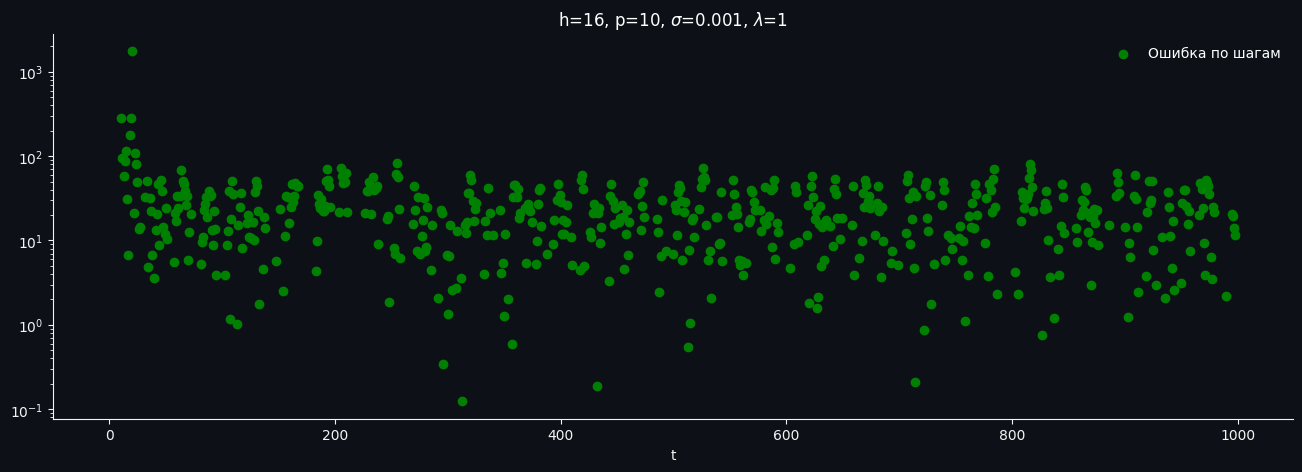

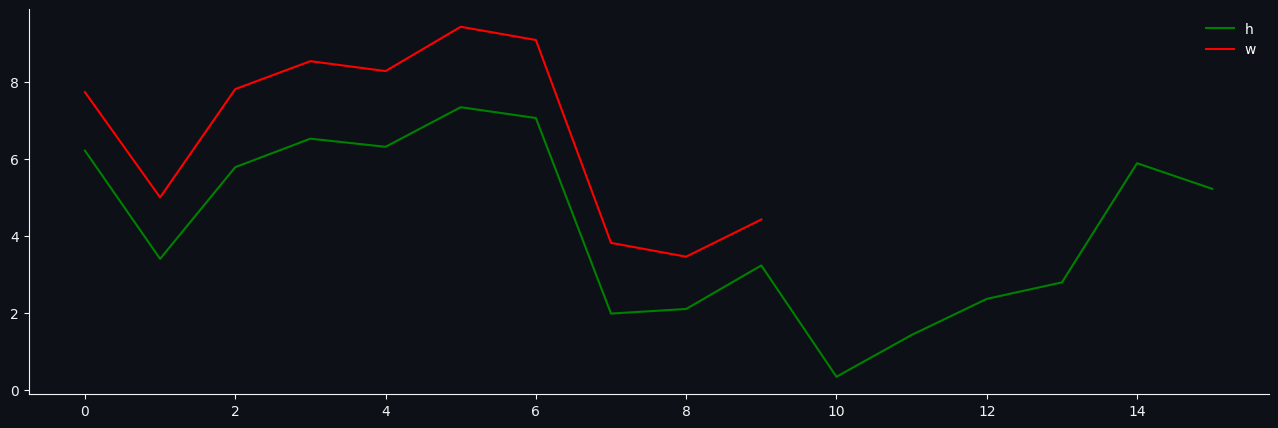

In [13]:
w, e = experiment(1e-3, 10, 1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()

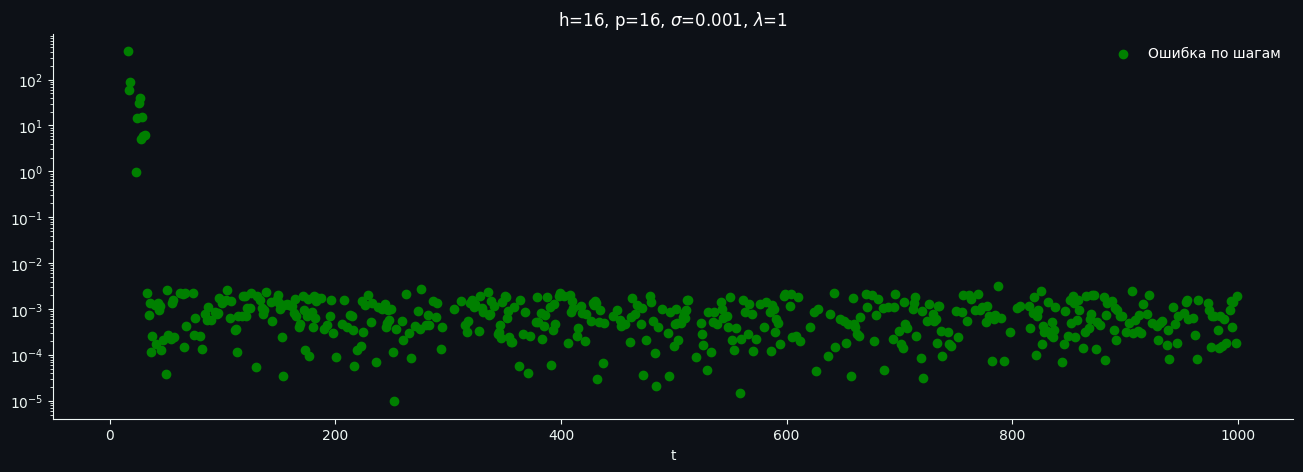

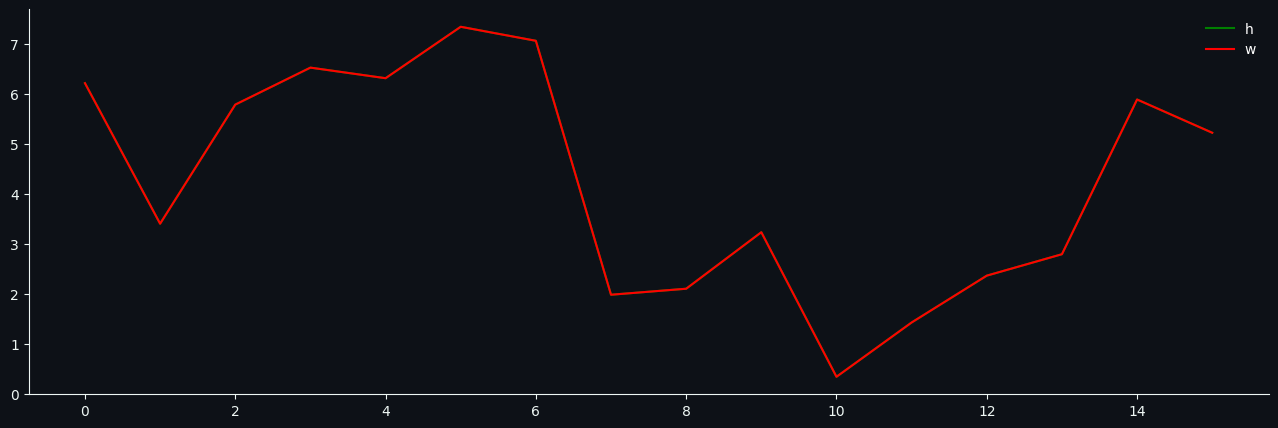

In [14]:
w, e = experiment(1e-3, 16, 1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()

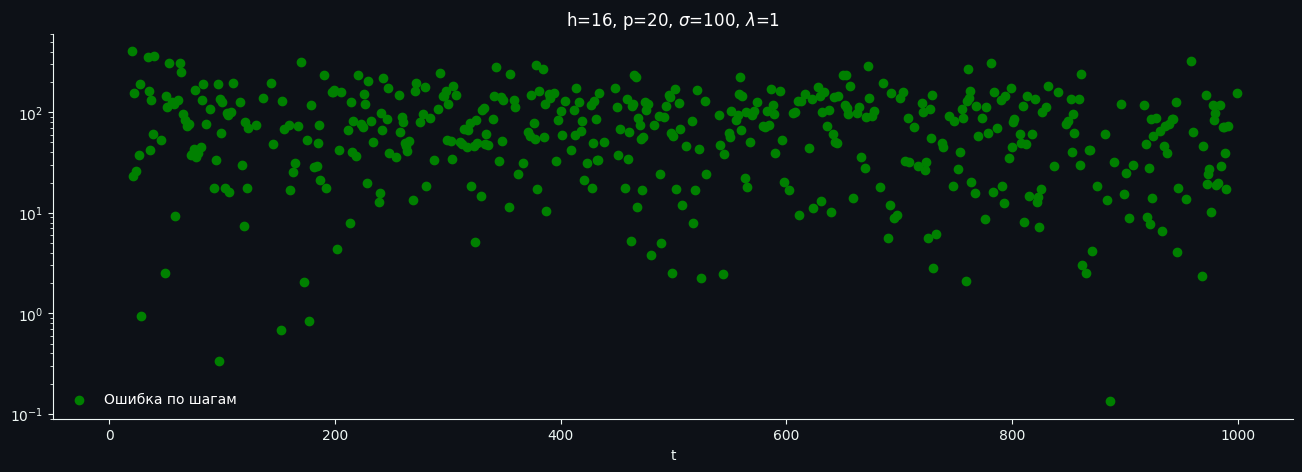

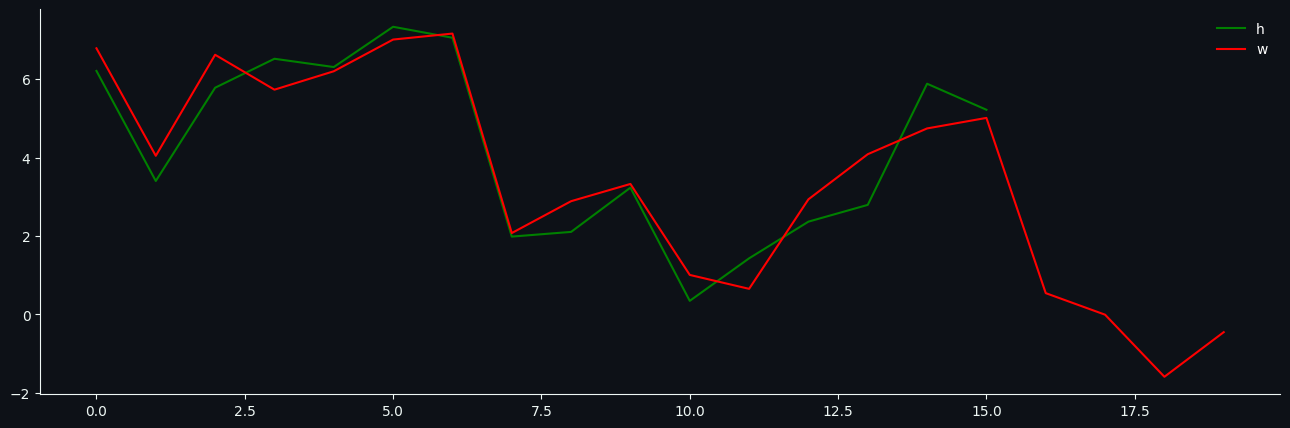

In [15]:
w, e = experiment(100, 20, 1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()

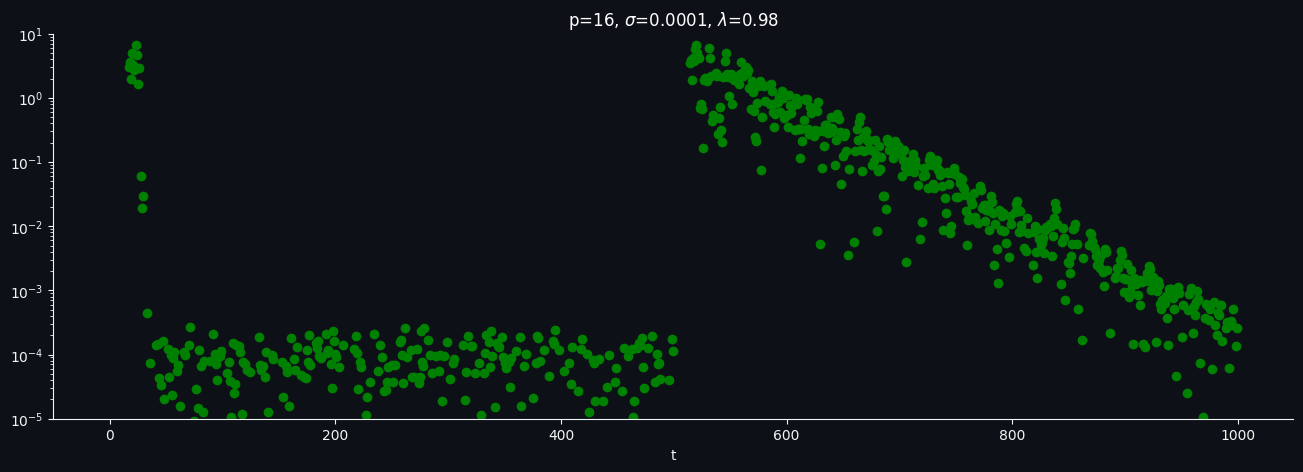

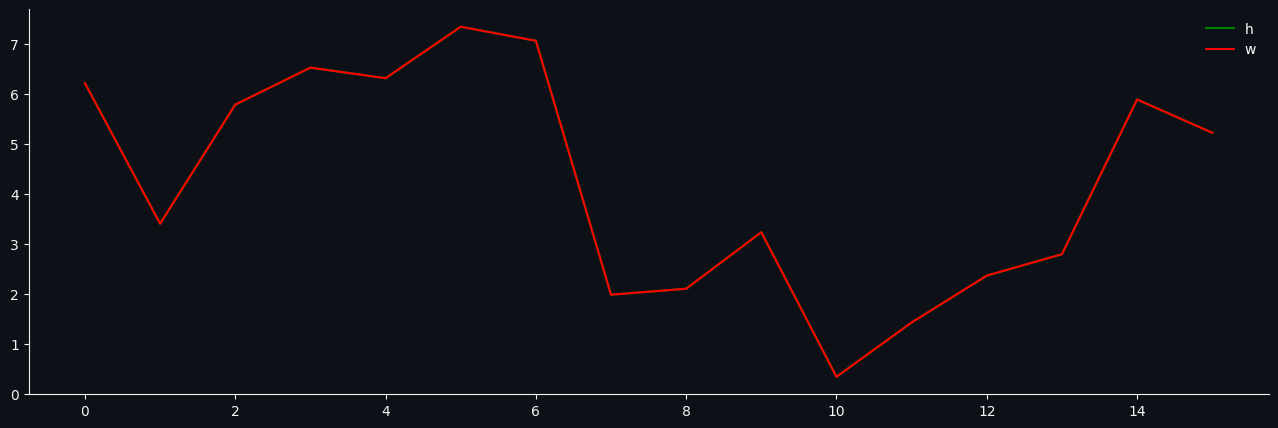

In [16]:
h1 = np.random.random((16, ))
h2 = np.random.random((16, ))
Lambda = 0.98


x = np.random.random((1000, ))
d = [*signal.lfilter(h, 1, x[:len(x)//2]), *signal.lfilter(h, 1, x[len(x)//2:])] + np.random.normal(0, sigma, len(x))

w, e = adaptrls(x, d, p, Lambda, 1e5)
plt.scatter(range(len(e)), e, label="Ошибка по шагам")
plt.xlabel("t")
plt.yscale("log")
plt.title(f"p={p}, $\sigma$={sigma}, $\lambda$={Lambda}")


plt.ylim(1e-5, 1e1)
plt.show()
plt.plot(h, label='h')
plt.plot(w, label='w')
plt.legend()


In [27]:
filename = 'audio.wav'
x, Fs = sf.read(filename, dtype='float32')


[0.         0.         0.         ... 0.01818848 0.01812744 0.01763916]


In [18]:
ipd.Audio(x, rate = Fs) # здесь x только моно

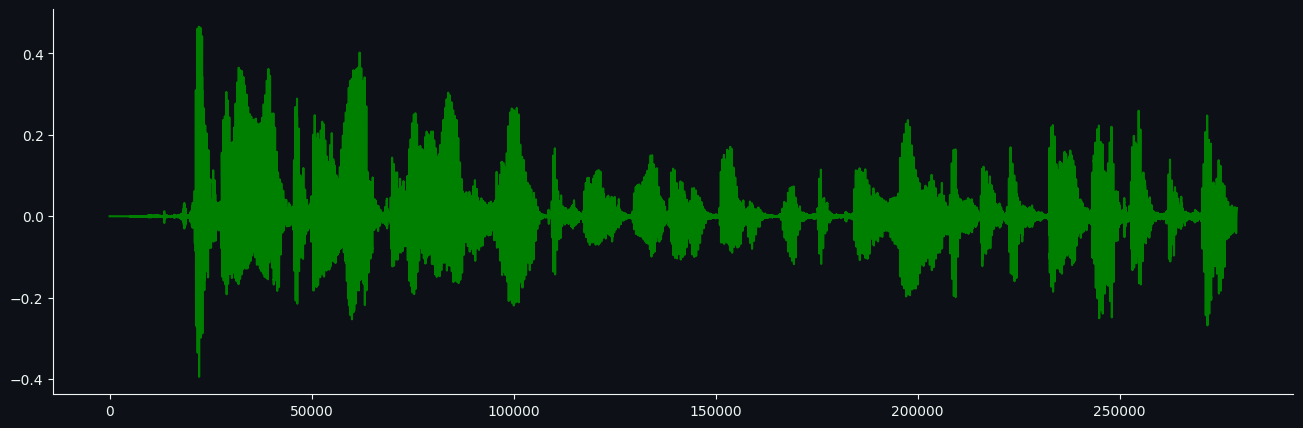

In [19]:
plt.plot(range(len(x)), x)

In [20]:
noise = np.random.normal(0, 1, len(x))

noise2 = signal.lfilter(np.array([1, -1]), 1, noise) # ФВЧ

In [21]:
sound_noise = x + noise
# sound_noise = signal.lfilter(np.array([1, 1]), 1, sound_noise)

In [22]:
ipd.Audio(sound_noise, rate = Fs) # здесь x только моно

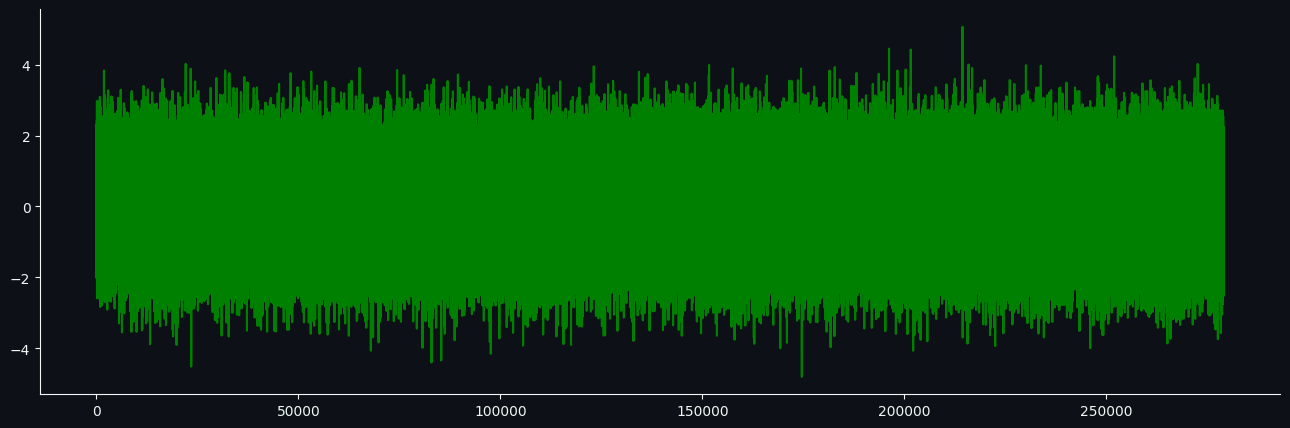

In [23]:
plt.plot(range(len(sound_noise)),sound_noise)

In [24]:
w, e = adaptrls(sound_noise, noise2, 20, 1, 1e4)

In [34]:
print(type(e))
print(e)
print(e*10)
ipd.Audio(e / 100, rate = Fs) # здесь x только моно

<class 'numpy.ndarray'>
[0.         0.         0.         ... 0.00030019 0.00018816 0.00050961]
[0.         0.         0.         ... 0.0030019  0.00188164 0.00509607]


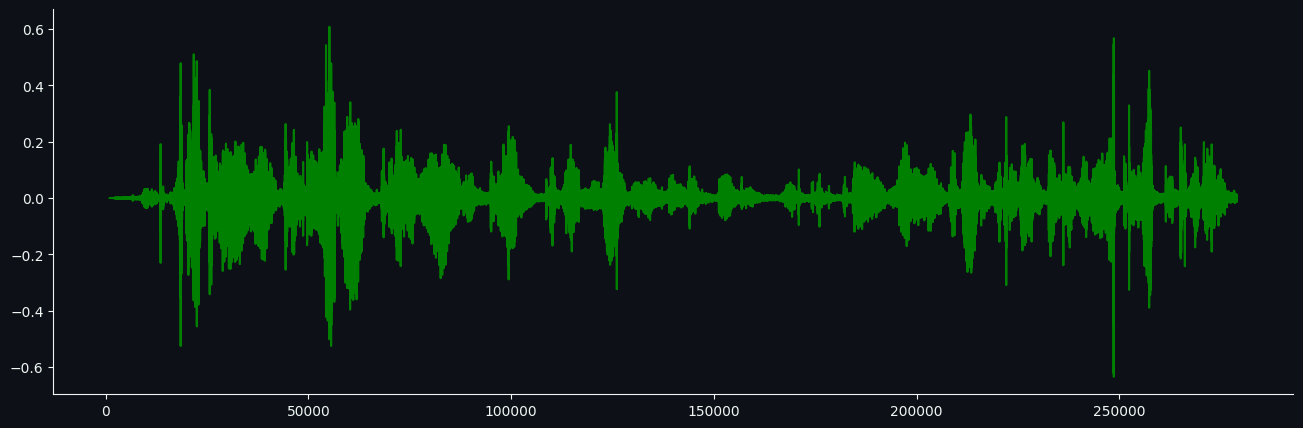

In [28]:
plt.plot(range(1000, len(e)), e[1000:] * 10)